Dataset link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=sharing

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fraud cases are extremely rare (Comparatively)— this is why fraud detection is hard.

In [ ]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

df.drop('Amount', axis=1, inplace=True)


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9991573329588147
ROC AUC: 0.8365940073271853
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



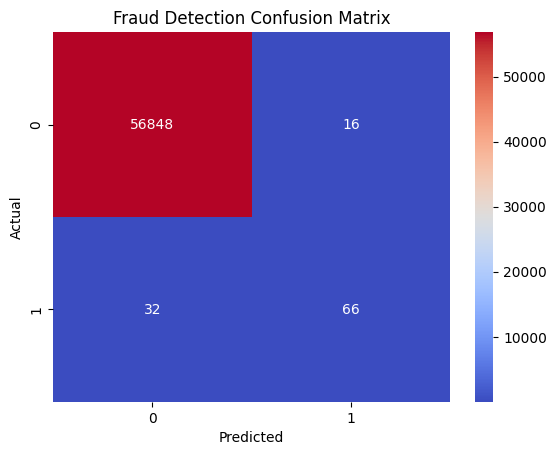

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fraud Detection Confusion Matrix")
plt.show()


In [ ]:
def detect_fraud_user_friendly():
    print("\n💳 Enter Transaction Details (Press Enter to use sample values)\n")

    amount = float(input("Transaction Amount in ₹ [e.g. 2500]: ") or 2500)
    time_gap_min = float(input("Minutes since last transaction [e.g. 10]: ") or 10)

    time_gap_sec = time_gap_min * 60

    base = X.mean()
    base['Time'] = time_gap_sec
    base['Amount_Scaled'] = scaler.transform([[amount]])[0][0]

    input_df = pd.DataFrame([base.values], columns=X.columns)

    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]

    print("\n🧾 TRANSACTION RESULT")

    reasons = []

    if amount > 20000:
        reasons.append("High transaction amount")
    if time_gap_min < 10:
        reasons.append("Very short time since last transaction")

    if pred == 1:
        print("🚨 Status: FRAUD DETECTED")
    else:
        print("✅ Status: Legitimate Transaction")

    print("Fraud Probability:", round(prob*100,2), "%")

    if reasons:
        print("\n🔍 Explanation:")
        for r in reasons:
            print("•", r)


In [ ]:

detect_fraud_user_friendly()



💳 Enter Transaction Details (Press Enter to use sample values)

Transaction Amount in ₹ [e.g. 2500]: 78000
Minutes since last transaction [e.g. 10]: 4

🧾 TRANSACTION RESULT
🚨 Status: FRAUD DETECTED
Fraud Probability: 100.0 %

🔍 Explanation:
• High transaction amount
• Very short time since last transaction


Most genuine users don’t suddenly spend ₹78,000 within 4 minutes of their last transaction.